# How to use the exposed factory functions for Matrix types

In [2]:
import numpy as np
import ipywidgets as widgets
from matplotlib import pyplot as plt
from IPython.display import display

from lmath import Vector2f, Vector3f, Vector4f
from lmath import Vector2d, Vector3d, Vector4d
from lmath import Matrix2f, Matrix3f, Matrix4f
from lmath import Matrix2d, Matrix3d, Matrix4d

%matplotlib inline

## Rotation matrices (2d)

In [5]:
w_angle = widgets.FloatSlider(0, min=-np.pi, max=np.pi, step=0.01)
display(w_angle)

FloatSlider(value=0.0, max=3.141592653589793, min=-3.141592653589793, step=0.01)

In [16]:
# Have a circle at hand to be drawn when needed :)
tt = np.linspace(-np.pi, np.pi, 100)
xx, yy = np.cos(tt), np.sin(tt)

Text(-0.0575791671872139, 0.9983409643173218, 'rotated')

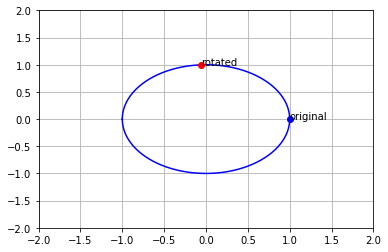

In [17]:
mat = Matrix2f.Rotation(w_angle.value)
vec = Vector2f(1.0, 0.0) # x unit vector
vec_rotated = mat * vec
plt.plot(xx, yy, 'b-')
plt.plot([vec.x], [vec.y], 'bo')
plt.plot([vec_rotated.x], [vec_rotated.y], 'ro')
plt.axis([-2, 2, -2, 2])
plt.grid(True)
plt.annotate("original", xy=vec)
plt.annotate("rotated", xy=vec_rotated)

## Scale matrices (2d)

In [25]:
w_scale = widgets.FloatSlider(1.0, min=1.0, max=5.0, step=0.01)
display(w_scale)

FloatSlider(value=1.0, max=5.0, min=1.0, step=0.01)

Text(2.5999999046325684, 0.0, 'scaled')

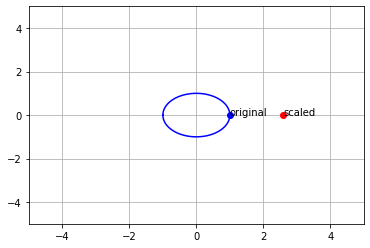

In [26]:
scale = w_scale.value
mat = Matrix2f.Scale(scale, scale)
vec = Vector2f(1.0, 0.0) # x unit vector
vec_scaled = mat * vec
plt.plot(xx, yy, 'b-')
plt.plot([vec.x], [vec.y], 'bo')
plt.plot([vec_scaled.x], [vec_scaled.y], 'ro')
plt.axis([-5, 5, -5, 5])
plt.grid(True)
plt.annotate("original", xy=vec)
plt.annotate("scaled", xy=vec_scaled)

## Rotation matrices (3d)

In [34]:
from mpl_toolkits import mplot3d
w_angle_x = widgets.FloatSlider(np.pi/4, min=-np.pi, max=np.pi, step=0.01)
w_angle_y = widgets.FloatSlider(np.pi/4, min=-np.pi, max=np.pi, step=0.01)
w_angle_z = widgets.FloatSlider(np.pi/4, min=-np.pi, max=np.pi, step=0.01)
display(w_angle_x)
display(w_angle_y)
display(w_angle_z)

FloatSlider(value=0.7853981633974483, max=3.141592653589793, min=-3.141592653589793, step=0.01)

FloatSlider(value=0.7853981633974483, max=3.141592653589793, min=-3.141592653589793, step=0.01)

FloatSlider(value=0.7853981633974483, max=3.141592653589793, min=-3.141592653589793, step=0.01)

In [43]:
# Have a few circles at hand to be drawn when needed :)
n_samples = 100
tt = np.linspace(-np.pi, np.pi, n_samples)
zeros = np.zeros(n_samples)
xx1, yy1 = np.cos(tt), np.sin(tt)
yy2, zz2 = np.cos(tt), np.sin(tt)
zz3, xx3 = np.cos(tt), np.sin(tt)

In [55]:
rotmat_x = Matrix3f.RotationX(w_angle_x.value)
rotmat_y = Matrix3f.RotationY(w_angle_y.value)
rotmat_z = Matrix3f.RotationZ(w_angle_z.value)

vec_rotx = rotmat_x * Vector3f(0.0, 1.0, 0.0)
vec_roty = rotmat_y * Vector3f(0.0, 0.0, 1.0)
vec_rotz = rotmat_z * Vector3f(1.0, 0.0, 0.0)

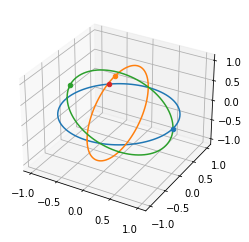

In [56]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(xx1, yy1, zeros)
ax.plot3D(zeros, yy2, zz2)
ax.plot3D(xx3, zeros, zz3)
ax.scatter3D(vec.x, vec.y, vec.z, 'bo')
ax.scatter3D(vec_rotx.x, vec_rotx.y, vec_rotx.z, 'ro')
ax.scatter3D(vec_roty.x, vec_roty.y, vec_roty.z, 'ro')
ax.scatter3D(vec_rotz.x, vec_rotz.y, vec_rotz.z, 'ro')